<a href="https://colab.research.google.com/github/ranu-agrawal/MLnow_2.0/blob/main/03_LinearRegression/Univariate_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand/download)

**Date Created**: Jun 11, 2021


**Author**:
 Ranu Agrawal

 **Mentor**: Shivani Shimpi

**Reach out**:
[GitHub](https://github.com/ranu-agrawal) | [LinkedIn](https://www.linkedin.com/in/ranu-agrawal/)



Feel free to check out my [website](http://ranu-agrawal.netlify.app) for more information about me

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/MyDrive/hotel'

/content/drive/MyDrive/hotel


In [5]:
ls

02_ExploratoryDataAnalysis.ipynb  Univariate_LinearRegression.ipynb
cleanedMathData.csv               univariate_MathData_2.csv
hotel_bookings.csv


In [6]:
import os
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library
import os #using os commands between the python language

In [7]:
mathData = pd.read_csv('hotel_bookings.csv') #load the csv file as dataframe

In [8]:
mathData.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [9]:
mathData.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [10]:
uniMathData = mathData[['stays_in_weekend_nights', 'stays_in_week_nights']]
uniMathData.tail(5)

,stays_in_weekend_nights,stays_in_week_nights
119385,2,5
119386,2,5
119387,2,5
119388,2,5
119389,2,7


In [11]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [12]:
ls

02_ExploratoryDataAnalysis.ipynb  Univariate_LinearRegression.ipynb
cleanedMathData.csv               univariate_MathData_2.csv
hotel_bookings.csv


#Data visualization

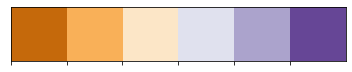

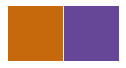

In [13]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [14]:
uniMathData.columns #columns in the dataframe

Index(['stays_in_weekend_nights', 'stays_in_week_nights'], dtype='object')

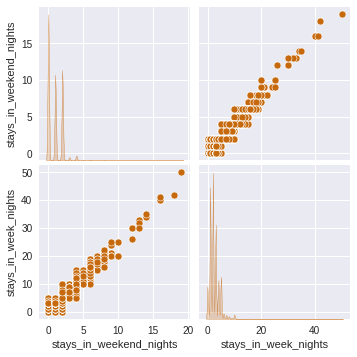

In [15]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['stays_in_weekend_nights', 'stays_in_week_nights'],
             y_vars =  ['stays_in_weekend_nights', 'stays_in_week_nights'],
       diag_kind='kde'
             )

#Data Splits

In [16]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

        stays_in_weekend_nights  stays_in_week_nights
5627                          2                     5
119322                        0                     3
75310                         1                     1
90032                         2                     2
75368                         0                     2
    stays_in_weekend_nights  stays_in_week_nights
2                         0                     1
10                        0                     4
13                        0                     4
20                        1                     4
21                        2                     4


In [17]:
print(trainDataset.shape)
print(testDataset.shape)

(95512, 2)
(23878, 2)


In [18]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

        stays_in_weekend_nights  stays_in_week_nights
5627                          2                     5
119322                        0                     3
75310                         1                     1
90032                         2                     2
75368                         0                     2
    stays_in_weekend_nights  stays_in_week_nights
2                         0                     1
10                        0                     4
13                        0                     4
20                        1                     4
21                        2                     4


In [19]:

trainLabels = trainFeatures.pop('stays_in_weekend_nights')
testLabels = testFeatures.pop('stays_in_weekend_nights')

print(trainLabels.head())
print(testLabels.head())

5627      2
119322    0
75310     1
90032     2
75368     0
Name: stays_in_weekend_nights, dtype: int64
2     0
10    0
13    0
20    1
21    2
Name: stays_in_weekend_nights, dtype: int64


In [20]:
print(trainFeatures.head())
print(testFeatures.head())

        stays_in_week_nights
5627                       5
119322                     3
75310                      1
90032                      2
75368                      2
    stays_in_week_nights
2                      1
10                     4
13                     4
20                     4
21                     4


In [21]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [22]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(0.001), 
    metrics = ['mae', 'mse']
)

In [ ]:
numEpochs = 320
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7864 - mae: 0.7864 - mse: 0.9843 - val_loss: 0.7409 - val_mae: 0.7409 - val_mse: 0.8555
Epoch 2/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7393 - mae: 0.7393 - mse: 0.8404 - val_loss: 0.7411 - val_mae: 0.7411 - val_mse: 0.8440
Epoch 3/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7392 - mae: 0.7392 - mse: 0.8375 - val_loss: 0.7412 - val_mae: 0.7412 - val_mse: 0.8398
Epoch 4/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7392 - mae: 0.7392 - mse: 0.8357 - val_loss: 0.7404 - val_mae: 0.7404 - val_mse: 0.8367
Epoch 5/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7393 - mae: 0.7393 - mse: 0.8334 - val_loss: 0.7407 - val_mae: 0.7407 - val_mse: 0.8383
Epoch 6/320
2985/2985 [==============================] - 4s 1ms/step - loss: 0.7392 - mae: 0.7392 - mse: 0.8352 - val_loss: 0.7407 - val_mae: 0.7407 - val_mse: 0.837

In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


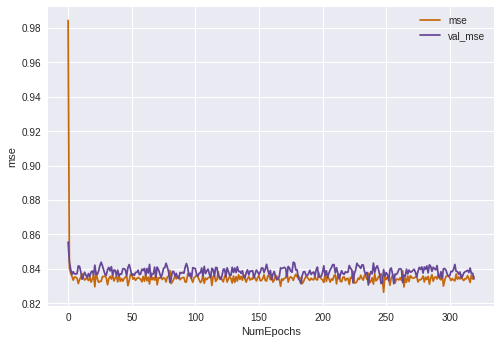

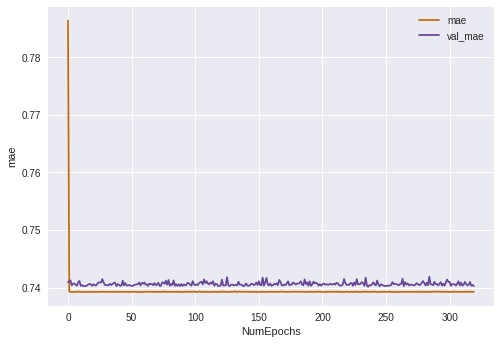

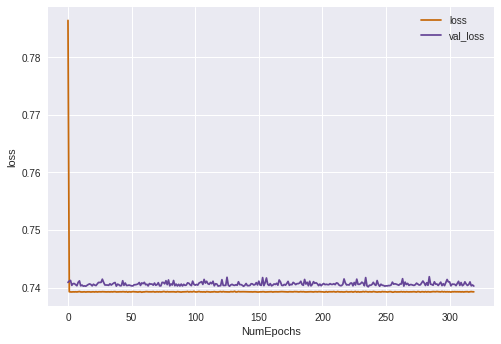

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[0.20880423]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[0.20880423]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[0.20880423]
 [0.6050719 ]
 [1.0013397 ]
 [1.3976073 ]
 [1.793875  ]]

List of Predictions (flattened out):
[0.20880423 0.6050719  1.0013397  1.3976073  1.793875  ]



In [ ]:
print(testFeatures)

        stays_in_week_nights
2                          1
10                         4
13                         4
20                         4
21                         4
...                      ...
119357                     3
119361                     3
119362                     5
119365                     5
119386                     5

[23878 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

23878
[0.20880423 1.3976073  1.3976073  ... 1.793875   1.793875   1.793875  ]


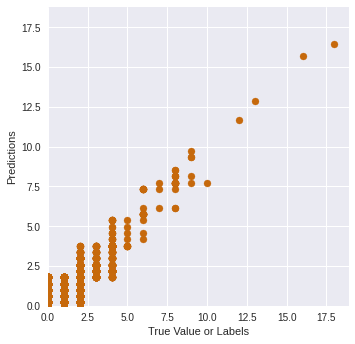

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

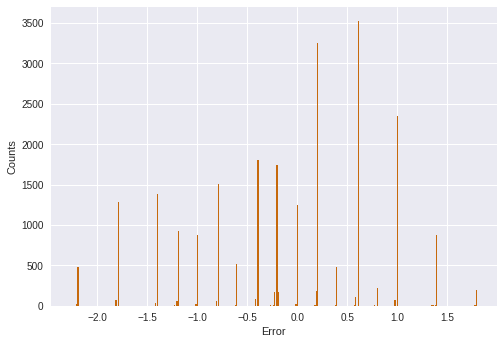

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)